<a href="https://colab.research.google.com/github/szh141/colab/blob/main/RandomForestClassifier_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA and dimension reduction
https://medium.com/@evertongomede/exploring-dimensionality-mathematical-foundations-applications-and-impacts-on-data-analysis-6fb4ef63b705

In [1]:
#Step 1: Generating a Synthetic High-Dimensional Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**sklearn.datasets.make_classification**

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

**fit_transform**

**transform**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [3]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

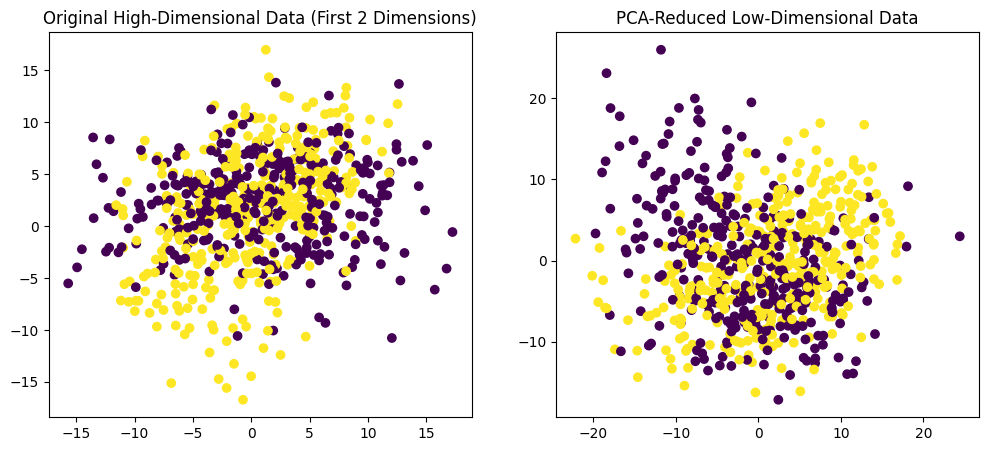

In [4]:
# Plot the first two dimensions of the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Original High-Dimensional Data (First 2 Dimensions)')

# Plot the PCA-reduced data
plt.subplot(1, 2, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.title('PCA-Reduced Low-Dimensional Data')
plt.show()

In [5]:
# Train on the original high-dimensional data
#RandomForestClassifier(n_estimators=10,random_state = 42)
#n_estimatorsint, default=100
clf_high_dim = RandomForestClassifier(random_state=42)
clf_high_dim.fit(X_train, y_train)
pred_high_dim = clf_high_dim.predict(X_test)
acc_high_dim = accuracy_score(y_test, pred_high_dim)

# Train on the PCA-reduced data
clf_low_dim = RandomForestClassifier(random_state=42)
clf_low_dim.fit(X_train_pca, y_train)
pred_low_dim = clf_low_dim.predict(X_test_pca)
acc_low_dim = accuracy_score(y_test, pred_low_dim)

print(f'Accuracy with high-dimensional data: {acc_high_dim:.2f}')
print(f'Accuracy with PCA-reduced data: {acc_low_dim:.2f}')

Accuracy with high-dimensional data: 0.89
Accuracy with PCA-reduced data: 0.58


**Interpretation and Comparison**

**Visualization and Interpretability**: The PCA-reduced data allows for easy visualization, helping in understanding data structure and clusters. However, the first two dimensions of the high-dimensional data do not provide a clear picture due to the loss of information when projecting to lower dimensions.

**Model Performance:** The comparison between the original high-dimensional dataset and the PCA-reduced dataset in terms of accuracy will provide insights into the impact of dimensionality on model performance. Typically, reducing dimensionality too much can lead to information loss, potentially worsening model performance. However, in some cases, removing redundant features can actually improve performance by reducing noise.

**Conclusion**: The exercise demonstrates the trade-offs involved in dimensionality reduction. While lower dimensions can simplify analysis and reduce computational requirements, it’s crucial to balance the benefits against the potential loss of information critical for accurate predictions or analysis.

Try reduce it to 15 components, just remove the redundant features

In [7]:
# Apply PCA to reduce dimensions to 15
pca = PCA(n_components=15)
X_train_pca_15 = pca.fit_transform(X_train)
X_test_pca_15 = pca.transform(X_test)

In [9]:
# Train on the original high-dimensional data
clf_high_dim = RandomForestClassifier(random_state=42)
clf_high_dim.fit(X_train, y_train)
pred_high_dim = clf_high_dim.predict(X_test)
acc_high_dim = accuracy_score(y_test, pred_high_dim)

# Train on the PCA-reduced data
# 15 features instead of 2
clf_low_dim = RandomForestClassifier(random_state=42)
clf_low_dim.fit(X_train_pca_15, y_train)
pred_low_dim = clf_low_dim.predict(X_test_pca_15)
acc_low_dim = accuracy_score(y_test, pred_low_dim)

print(f'Accuracy with high-dimensional data: {acc_high_dim:.2f}')
print(f'Accuracy with PCA-reduced_15 data: {acc_low_dim:.2f}')

Accuracy with high-dimensional data: 0.89
Accuracy with PCA-reduced_15 data: 0.91
